# Background
Covid has affected every country in the globe since November 2019 affecting both economically and socially. The aim of our study is to find the factors that contributed to covid spread. My main focus is analysing the correlation between population density and covid spread in UK.

# Research Questions  
1. How does covid spread vary over time.
2. Which regions and areas had more covid cases. Are there any covid hotspots?
3. Do Covid hotspots vary over time?
4. Is there any correlation between covid cases and deaths across various regions?
5. Is poulation density a factor in spread of covid?

# import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
case_data = pd.read_csv('cases.csv')
case_data.head()

,areaCode,areaName,areaType,date,newCasesByPublishDate
0,E06000003,Redcar and Cleveland,utla,2021-06-30,93
1,E06000014,York,utla,2021-06-30,146
2,E06000050,Cheshire West and Chester,utla,2021-06-30,148
3,E08000001,Bolton,utla,2021-06-30,127
4,E08000016,Barnsley,utla,2021-06-30,157


In [3]:
case_data.shape

(88319, 5)

# case_data Analysis

In [4]:
# checking for missing values 
case_data.isnull().sum()
# There is no missing value in the datasets

areaCode                 0
areaName                 0
areaType                 0
date                     0
newCasesByPublishDate    0
dtype: int64

In [5]:
# Checking for Duplicated rows
case_data[case_data.duplicated()]
# There is no duplicated row in the dataset

,areaCode,areaName,areaType,date,newCasesByPublishDate


In [6]:
# Observing the types of columns in data
case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88319 entries, 0 to 88318
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   areaCode               88319 non-null  object
 1   areaName               88319 non-null  object
 2   areaType               88319 non-null  object
 3   date                   88319 non-null  object
 4   newCasesByPublishDate  88319 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [7]:
case_data[['areaCode', 'areaName', 'areaType']] =case_data[['areaCode', 'areaName', 'areaType']].astype('category')
case_data['date'] = case_data['date'].astype('datetime64[D]')

In [8]:
case_data.describe()

,newCasesByPublishDate
count,88319.000000
mean,52.627022
std,116.098863
min,0.000000
25%,3.000000
50%,14.000000
75%,53.000000
max,3174.000000


In [9]:
case_data['date'].min()

Timestamp('2020-04-17 00:00:00')

In [10]:
case_data['date'].max()# dataset is taken between 17 April 2020 to 30 June 2021, 

Timestamp('2021-06-30 00:00:00')

In [11]:
# unique number of cases
case_data.areaName.nunique()

214

In [12]:
case_data.areaName.value_counts()

York                                    440
Kingston upon Hull, City of             440
Kensington and Chelsea                  440
Islington                               440
Isle of Wight                           440
Hounslow                                440
Hillingdon                              440
Hertfordshire                           440
Herefordshire, County of                440
Havering                                440
Harrow                                  440
Haringey                                440
Hampshire                               440
Hammersmith and Fulham                  440
Halton                                  440
Greenwich                               440
Gloucestershire                         440
Gateshead                               440
Essex                                   440
Kent                                    440
Kingston upon Thames                    440
North Lincolnshire                      440
Kirklees                        

In [13]:
d = case_data

In [14]:
dd = {'Yorkshire and the Humber':['York', 'Kirklees', 'Leeds', 'North Lincolnshire','Kingston upon Hull, City of', 'East Riding of Yorkshire',
                           'Bradford', 'Barnsley', 'Calderdale', 'Doncaster', 'North East Lincolnshire', 'Wakefield', 'Sheffield', 
                           'Rotherham', 'North Yorkshire'],
'North East': [ 'Gateshead', 'Newcastle upon Tyne', 'Middlesbrough','Darlington', 'County Durham', 'South Tyneside',
             'Sunderland', 'Stockton-on-Tees', 'Northumberland', 'Redcar and Cleveland', 'North Tyneside', 'Hartlepool'],
'North West': [ 'Halton',  'Kirklees', 'Manchester', 'Liverpool','Tameside','Trafford', 'Wigan', 'Oldham', 'Wirral', 'Rochdale',
              'Lancashire', 'Knowsley', 'Bolton', 'Blackpool', 'Blackburn with Darwen', 'Bury', 'Cumbria', 'Cheshire West and Chester',
             'Cheshire East', 'Sefton', 'Salford', 'Stockport', 'St. Helens', 'Warrington'],
'London': ['Kensington and Chelsea','Islington', 'Hounslow', 'Hillingdon', 'Havering', 'Harrow', 'Haringey', 
         'Hammersmith and Fulham', 'Greenwich', 'Kingston upon Thames', 'Newham', 'Merton','Lewisham','Lambeth',
         'Enfield', 'Ealing', 'Bromley', 'Brent', 'Bexley', 'Barnet', 'Barking and Dagenham', 'Croydon', 'Camden', 'Waltham Forest',
         'Wandsworth', 'Southwark', 'Sutton', 'Tower Hamlets', 'Westminster', 'Redbridge', 'Richmond upon Thames',
         'Hackney and City of London'],
'South East':['Isle of Wight', 'Hampshire', 'Kent', 'Milton Keynes', 'Medway', 'East Sussex', 'Brighton and Hove', 'Bracknell Forest',
            'Buckinghamshire', 'Southampton', 'Slough', 'Surrey', 'West Berkshire', 'Windsor and Maidenhead',
            'Oxfordshire', 'West Sussex', 'Wokingham', 'Portsmouth', 'Reading'],
'South West' : ['Gloucestershire', 'Bristol, City of', 'Bournemouth, Christchurch and Poole', 'Bath and North East Somerset',
             'Dorset', 'Devon', 'Cornwall and Isles of Scilly', 'South Gloucestershire', 'Somerset', 'North Somerset',
             'Swindon', 'Torbay', 'Wiltshire', 'Plymouth'],
'East of England':['Hertfordshire', 'Essex', 'Norfolk', 'Luton', 'Bedford', 'Cambridgeshire', 'Central Bedfordshire','Southend-on-Sea', 'Suffolk',
       'Thurrock', 'Peterborough'],
'West Midlands': ['Herefordshire, County of', 'Birmingham', 'Dudley', 'Coventry', 'Walsall', 'Solihull', 'Shropshire', 'Telford and Wrekin',
                'Warwickshire', 'Sandwell', 'Stoke-on-Trent', 'Staffordshire', 'Wolverhampton', 'Worcestershire'],
'East Midlands': ['Leicestershire', 'Leicester', 'Derbyshire', 'Derby', 'Lincolnshire', 'Nottingham', 'Northamptonshire',
                'Nottinghamshire', 'Rutland'],
'Wales': ['Merthyr Tydfil', 'Monmouthshire', 'Rhondda Cynon Taf', 'Swansea', 'Newport', 'Denbighshire', 'Powys',
        'Neath Port Talbot', 'Isle of Anglesey', 'Gwynedd', 'Wrexham', 'Flintshire', 'Cardiff', 'Vale of Glamorgan',
        'Conwy', 'Bridgend', 'Torfaen', 'Blaenau Gwent','Caerphilly','Carmarthenshire', 'Pembrokeshire', 'Ceredigion'],
      
'Scotland': ['Angus', 'Aberdeen City', 'South Lanarkshire', 'Stirling', 'Midlothian', 'Dundee City', 'Renfrewshire',
           'Falkirk', 'Glasgow City', 'Fife', 'City of Edinburgh', 'Aberdeenshire', 'Moray', 'Perth and Kinross',
           'West Lothian', 'Highland', 'Inverclyde', 'North Lanarkshire','Dumfries and Galloway', 'East Lothian',
           'East Dunbartonshire', 'East Ayrshire', 'West Dunbartonshire', 'Argyll and Bute', 'East Renfrewshire',
           'South Ayrshire', 'North Ayrshire', 'Scottish Borders', 'Shetland Islands', 'Clackmannanshire',
           'Orkney Islands', 'Na h-Eileanan Siar'],
'Northern Ireland': ['Antrim and Newtownabbey', 'Ards and North Down', 'Belfast', 'Causeway Coast and Glens', 'Mid and East Antrim',
                   'Lisburn and Castlereagh', 'Newry, Mourne and Down', 'Armagh City, Banbridge and Craigavon', 'Mid Ulster',
                   'Derry City and Strabane', 'Fermanagh and Omagh']}

In [15]:
d1 = {k: oldk for oldk, oldv in dd.items() for k in oldv}

In [16]:
d['region'] = d['areaName'].map(d1)

In [17]:
d['region'] = d['region'].astype('category')

In [18]:
dd1 = {'Yorkshire and the Humber':5526350 ,'North East': 2680763, 'North West':7367456 ,'London':9002488 ,'South East': 9217265,
                       'South West':5659143,'East of England': 6269161 , 'West Midlands':5961929, 'East Midlands':4865583, 'Wales':3169586 , 
                       'Scotland':5466000 , 'Northern Ireland':1895510 }

In [19]:
d['Day'] = d['date'].dt.day
d['Month'] = d['date'].dt.month
d['Year'] = d['date'].dt.year

In [20]:
d.head()

,areaCode,areaName,areaType,date,newCasesByPublishDate,region,Day,Month,Year
0,E06000003,Redcar and Cleveland,utla,2021-06-30,93,North East,30,6,2021
1,E06000014,York,utla,2021-06-30,146,Yorkshire and the Humber,30,6,2021
2,E06000050,Cheshire West and Chester,utla,2021-06-30,148,North West,30,6,2021
3,E08000001,Bolton,utla,2021-06-30,127,North West,30,6,2021
4,E08000016,Barnsley,utla,2021-06-30,157,Yorkshire and the Humber,30,6,2021


## Covid Infections over time

In [21]:
pd.DataFrame(pd.crosstab(d.Year, d.Month))

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,0,0,0,2067,4642,5094,5330,6347,6417,6634,6420,6634
2021,6634,5992,6634,6420,6634,6420,0,0,0,0,0,0


In [22]:
m = d[d.Year==2020]
pd.DataFrame(pd.crosstab(m.Day, m.Month))

Month,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,
1,0,148,168,170,195,213,214,214,214
2,0,148,169,170,196,213,214,214,214
3,0,148,169,170,196,213,214,214,214
4,0,148,169,171,196,214,214,214,214
5,0,148,169,171,197,214,214,214,214
6,0,148,170,171,197,214,214,214,214
7,0,148,170,171,198,214,214,214,214
8,0,148,170,171,199,214,214,214,214
9,0,148,170,171,201,214,214,214,214


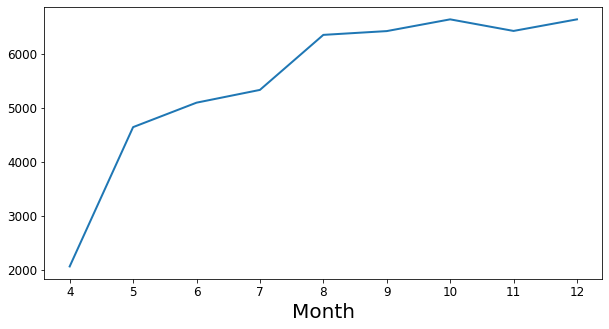

In [23]:


m.groupby('Month')['Day'].count().plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Month', fontsize=20);

In [24]:
mm = d[d.Year==2021]
pd.DataFrame(pd.crosstab(mm.Day, mm.Month))

Month,1,2,3,4,5,6
Day,,,,,,
1,214,214,214,214,214,214
2,214,214,214,214,214,214
3,214,214,214,214,214,214
4,214,214,214,214,214,214
5,214,214,214,214,214,214
6,214,214,214,214,214,214
7,214,214,214,214,214,214
8,214,214,214,214,214,214
9,214,214,214,214,214,214


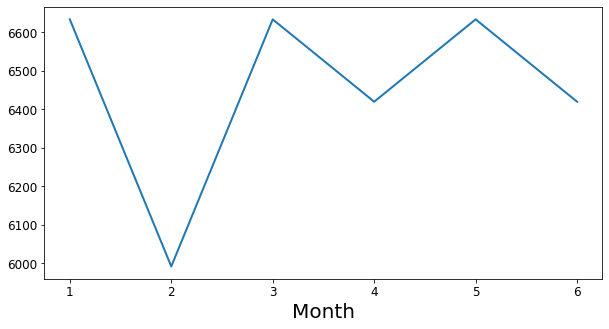

In [25]:
mm.groupby('Month')['Day'].count().plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Month', fontsize=20);

In [91]:
cc =  d[(d.Year == 2021)&(d.Month == 5)]
cc

,areaCode,areaName,areaType,date,newCasesByPublishDate,region,Day,Month,Year
450,E06000003,Redcar and Cleveland,utla,2021-05-31,1,North East,31,5,2021
451,E06000014,York,utla,2021-05-31,15,Yorkshire and the Humber,31,5,2021
452,E06000050,Cheshire West and Chester,utla,2021-05-31,30,North West,31,5,2021
453,E08000001,Bolton,utla,2021-05-31,151,North West,31,5,2021
454,E08000016,Barnsley,utla,2021-05-31,4,Yorkshire and the Humber,31,5,2021
...,...,...,...,...,...,...,...,...,...
86040,E06000036,Bracknell Forest,utla,2021-05-01,1,South East,1,5,2021
86041,E06000037,West Berkshire,utla,2021-05-01,9,South East,1,5,2021
86042,E08000035,Leeds,utla,2021-05-01,54,Yorkshire and the Humber,1,5,2021
86043,E09000017,Hillingdon,utla,2021-05-01,2,London,1,5,2021


In [92]:
cc['newCasesByPublishDate'].sum()

73021

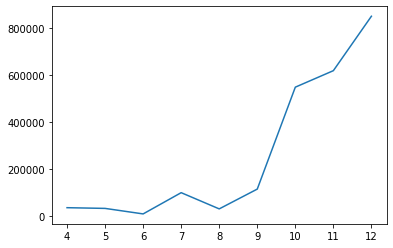

In [95]:
f_x = [4,5,6,7,8,9,10,11,12]
f_0 = [36719,33695, 10237, 100552, 31624,115794, 549090, 619228,850595]
plt.plot(f_x,f_0)

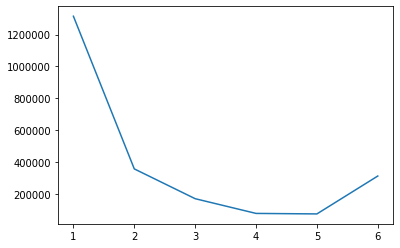

In [96]:
f_y = [1,2,3,4,5,6]
f_1 = [1315404,355959, 168701, 76160, 73021,311187]
plt.plot(f_y,f_1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2772ef4ef48>,
 'caps': [<matplotlib.lines.Line2D at 0x2772f249b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2772cffac88>],
 'medians': [<matplotlib.lines.Line2D at 0x2772f24eb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2772f252948>],
 'means': []}

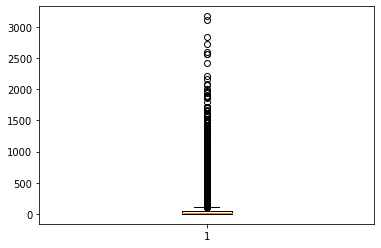

In [27]:
plt.boxplot(cc['newCasesByPublishDate'])

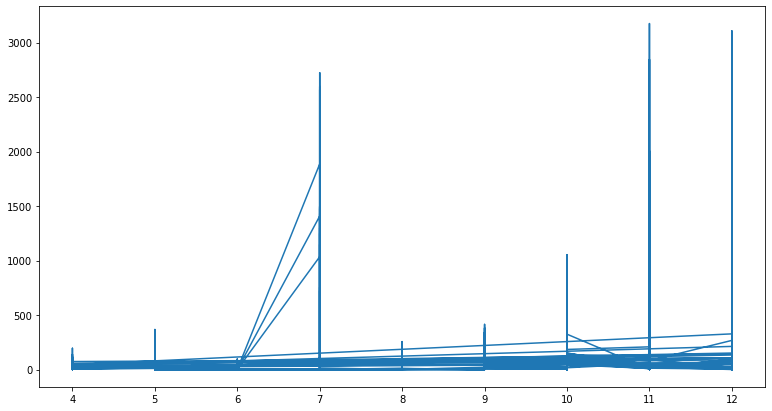

In [28]:
fig = plt.figure(figsize=(13, 7))
plt.plot(cc['Month'],cc['newCasesByPublishDate'])

In [30]:
final_data = pd.read_csv('main.csv')

In [31]:
final_data

,Region,Covid Cases,Population Density
0,North West,725512,522
1,Yorkshire and the Humber,389158,359
2,North East,212444,312
3,London,745274,5727
4,South East,563690,483
5,South West,240334,237
6,East of England,403384,328
7,West Midlands,450137,459
8,East Midlands,345790,311
9,Wales,192780,153


In [32]:
y = final_data.iloc[:, 1].values

In [33]:
x = final_data.iloc[:, 2].values

In [34]:
region_names = final_data.iloc[:, 0].values

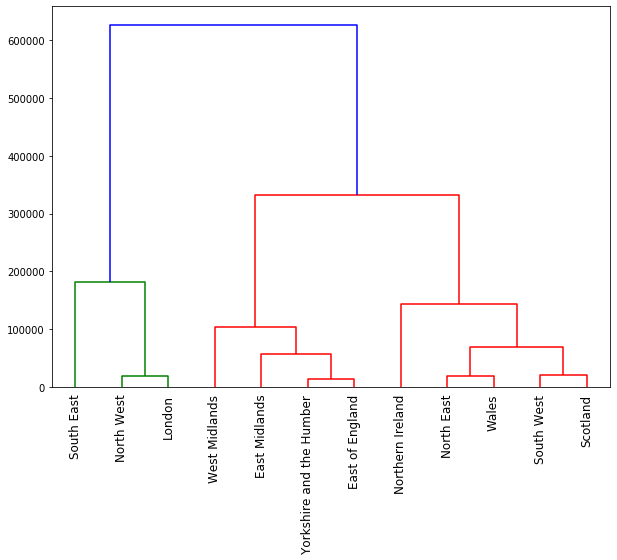

In [35]:
fig = plt.figure(figsize=(10, 7))
mergings = linkage(np.reshape(y, (len(y), 1)), method = 'complete')
dendrogram(mergings, labels = region_names, leaf_rotation = 90, leaf_font_size = 12)
plt.show()

In [36]:
la = fcluster(mergings, 200000, criterion = 'distance')
la


array([1, 2, 3, 1, 1, 3, 2, 2, 2, 3, 3, 3], dtype=int32)

In [37]:
pairs = pd.DataFrame({'labels': la, 'regions': region_names})

In [38]:
pairs.sort_values('labels')

,labels,regions
0,1,North West
3,1,London
4,1,South East
1,2,Yorkshire and the Humber
6,2,East of England
7,2,West Midlands
8,2,East Midlands
2,3,North East
5,3,South West
9,3,Wales


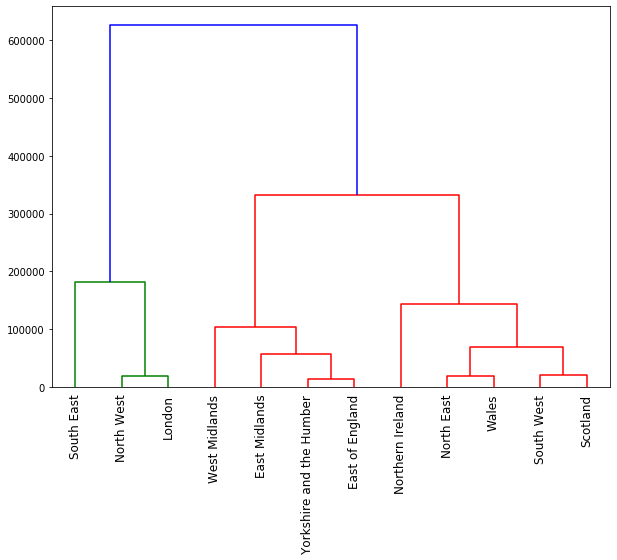

In [39]:
fig = plt.figure(figsize=(10, 7))
mergings_b = linkage(np.reshape(x, (len(x), 1)), method = 'complete')
dendrogram(mergings, labels = region_names, leaf_rotation = 90, leaf_font_size = 12)
plt.show()

In [40]:
la = fcluster(mergings_b, 200000, criterion = 'distance')
la

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Correlation between Covid cases and poulation density

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [42]:
final_data.shape

(12, 3)

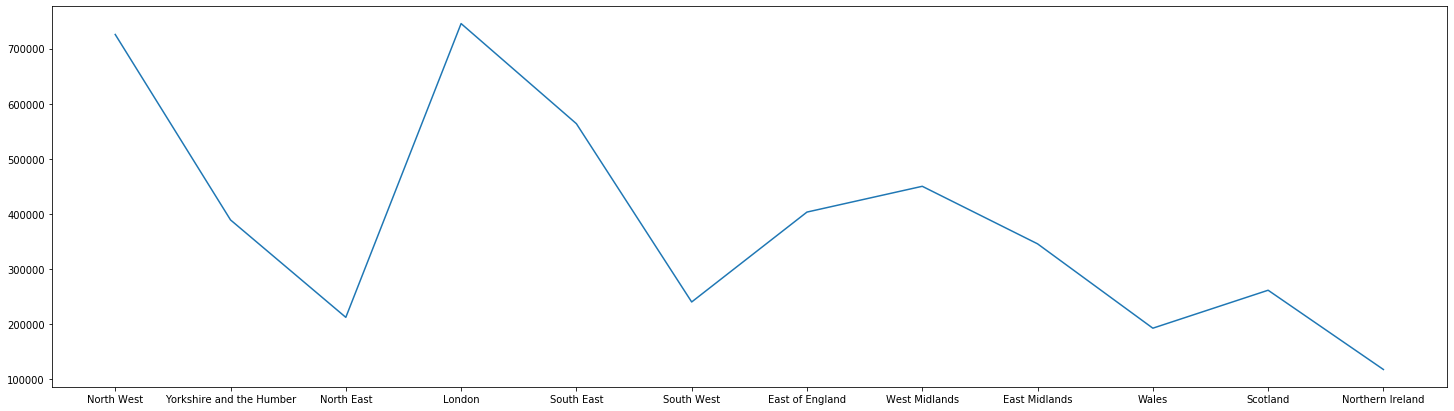

In [43]:
fig = plt.figure(figsize=(25, 7))
plt.plot(final_data['Region'],final_data['Covid Cases'])


In [55]:
final_data

,Region,Covid Cases,Population Density
0,North West,725512,522
1,Yorkshire and the Humber,389158,359
2,North East,212444,312
3,London,745274,5727
4,South East,563690,483
5,South West,240334,237
6,East of England,403384,328
7,West Midlands,450137,459
8,East Midlands,345790,311
9,Wales,192780,153


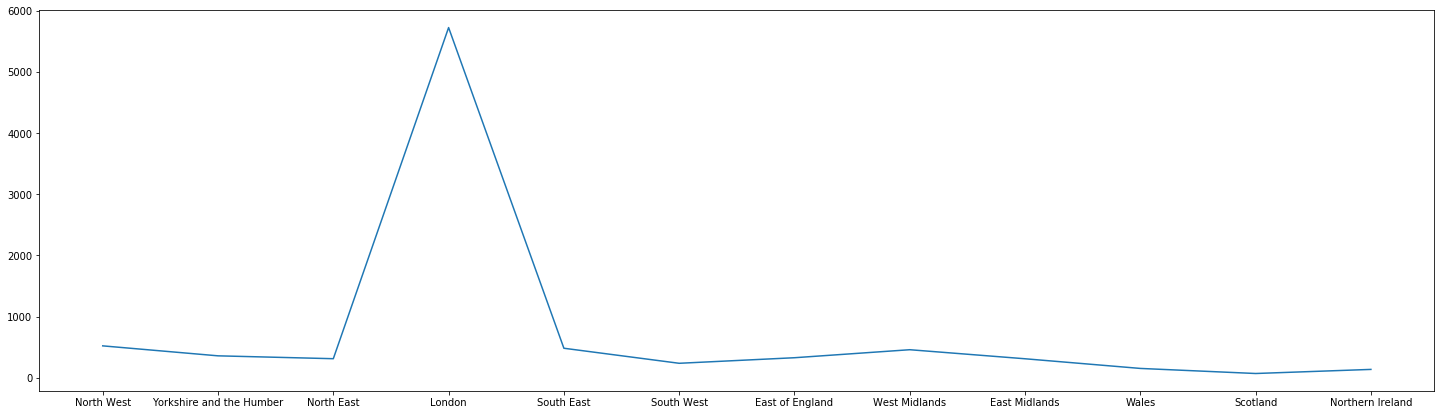

In [44]:
fig = plt.figure(figsize=(25, 7))
plt.plot(final_data['Region'],final_data['Population Density'])
plt.show()

In [45]:
final_data.head()

,Region,Covid Cases,Population Density
0,North West,725512,522
1,Yorkshire and the Humber,389158,359
2,North East,212444,312
3,London,745274,5727
4,South East,563690,483


In [46]:
xx = final_data.iloc[:,2].values
yy = final_data.iloc[:,1].values

In [47]:
import scipy.stats as stats

corrPearson, pValPearson = stats.pearsonr(xx,yy)
print ("Pearson's correlation is", corrPearson, "with a p-value of",pValPearson)

Pearson's correlation is 0.614973827094469 with a p-value of 0.03332078247991341


In [48]:
corrSpearman, pValSpearman = stats.spearmanr(xx,yy)
print ("Spearman's correlation is", corrSpearman, "with a p-value of",pValSpearman)

Spearman's correlation is 0.8951048951048951 with a p-value of 8.36658642909172e-05


There's a small difference between the two computations. Spearman's is higher. This is because Spearman's rank-based approach is better at capturing non-linear relationships. The p-values are the probabilities that correlation of the population is not correlated (i.e. with a null-hypothesis that the population are not correlated). This is very low, indicating that the effect and sample size is high enough to be confident statistically significant.

In [49]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xx, yy)

print ("Slope: ", slope)
print ("Intercept: ", intercept)
print ("p_value: ", p_value)
print ("std_err: ", std_err)

Slope:  79.87184127647596
Intercept:  326774.3323388852
p_value:  0.0333207824799133
std_err:  32.38656841403953


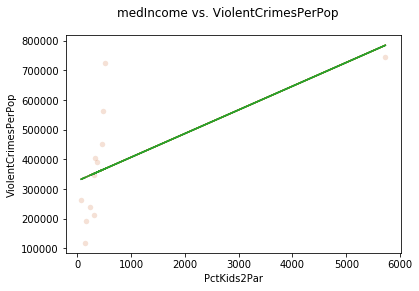

In [50]:
import numpy as np

#Method 1: Calculate 2 points directly from the parameters
x1=xx.min() #min value of the independent variable
x2=xx.max() #max value of the independent variable
y1=x1*slope + intercept #calculate the dependent variable value from x1
y2=x2*slope + intercept #calculate the dependent variable value from x2

#Method 2: Calculate every y (dependent variable value) from every x
#(independent variable value, directly from the parameters
modelledDependentMethod2  = xx*slope + intercept

#(this was the suggested method in the practical, but is unnecessary,
#because it's linear, so you only need 2 points)
modelledDependentMethod3  = np.polyval([slope, intercept], xx)

#Plot a scatterplot as before
plt.suptitle('medIncome vs. ViolentCrimesPerPop')
plt.xlabel('PctKids2Par')
plt.ylabel('ViolentCrimesPerPop')
plt.scatter(xx,yy , c = "#D06B36", s = 30, alpha = 0.2, linewidth='0')
#overlay the modelled line (all three will be on top of each other)
#Method 1:
plt.plot([x1,x2],[y1,y2])
#Method 2:
plt.plot(xx, modelledDependentMethod2)
#Method 3:
plt.plot(xx, modelledDependentMethod3)

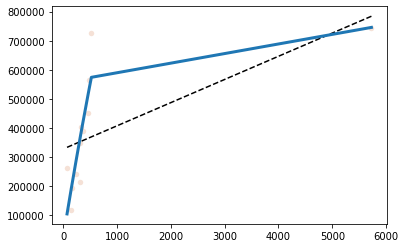

In [51]:
#Fit a second-order curve
pCoeff = np.polyfit(xx, yy, 2)
#Sort them, so the curve looks like a curve when drawn
xs = np.sort(xx)
#Calculate value for each of these using the polynomial
ys = np.polyval(pCoeff, xs)

#plot the data values
plt.scatter(xx,yy , c = "#D06B36", s = 30, alpha = 0.2, linewidth='0')
#plot the linear "curve" - make is dashed
plt.plot([x1,x2],[y1,y2], "k--")
#plot the second order polynomal curve
plt.plot(xs, ys, linewidth = 3, fillstyle="none")

195361.52318351567


{'whiskers': [<matplotlib.lines.Line2D at 0x2772f680e88>,
 'caps': [<matplotlib.lines.Line2D at 0x2772f684e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2772f67ba08>],
 'medians': [<matplotlib.lines.Line2D at 0x2772f689dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2772f689ec8>],
 'means': []}

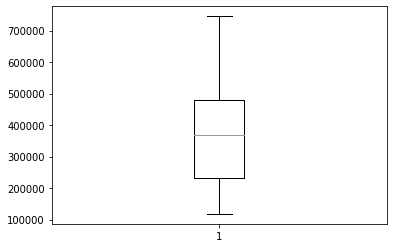

In [52]:
print(yy.std())
plt.boxplot(yy)

In [53]:
import statsmodels.api as sm

# our dependent variable is still "ViolentCrimesPerPop" which is still column2
dependent=yy;
# this time get two independent variables, i.e., regressors 
independents = xx
# We have to manually add the intercepts
independents_withconst = sm.add_constant(independents)

# we use the OLS function from statsmodels
model = sm.OLS(dependent,independents_withconst)
results = model.fit()

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     6.082
Date:                Wed, 07 Jul 2021   Prob (F-statistic):             0.0333
Time:                        00:33:04   Log-Likelihood:                -160.37
No. Observations:                  12   AIC:                             324.7
Df Residuals:                      10   BIC:                             325.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.268e+05   5.46e+04      5.990      0.0

In [54]:
print("R-squared:",results.rsquared)
print("MSE model:",results.mse_model)
print("MSE residuals:",results.mse_resid)
print("MSE total:",results.mse_total)
# It was observed that poulation density contributed tp 32% in covid spread.

R-squared: 0.3781928080112178
MSE model: 173209846638.57147
MSE residuals: 28478365024.842854
MSE total: 41635772444.27273


In [181]:
X_train, X_test, Y_train,Y_test = train_test_split(xx, yy, test_size = 0.2,random_state = 0)

**Comment**

The dataset used for this analysis contains information about covid cases in different areas of UK between 17th April 2020 and 30th June 2021.In 2020, the covid cases were 


# Death data analysis

In [33]:
death_data = pd.read_csv('deaths.csv')

In [5]:
death_data.head()

,areaCode,areaName,areaType,date,newOnsDeathsByRegistrationDate
0,E06000003,Redcar and Cleveland,utla,2021-06-18,0
1,E06000014,York,utla,2021-06-18,0
2,E06000050,Cheshire West and Chester,utla,2021-06-18,0
3,E08000001,Bolton,utla,2021-06-18,3
4,E08000016,Barnsley,utla,2021-06-18,0


In [6]:
death_data.shape

(11142, 5)

In [12]:
yorkshire_and_the_humber = ['York', 'Kirklees', 'Leeds', 'North Lincolnshire','Kingston upon Hull, City of', 'East Riding of Yorkshire',
                           'Bradford', 'Barnsley', 'Calderdale', 'Doncaster', 'North East Lincolnshire', 'Wakefield', 'Sheffield', 
                           'Rotherham', 'North Yorkshire']
north_east = [ 'Gateshead', 'Newcastle upon Tyne', 'Middlesbrough','Darlington', 'County Durham', 'South Tyneside',
             'Sunderland', 'Stockton-on-Tees', 'Northumberland', 'Redcar and Cleveland', 'North Tyneside', 'Hartlepool']
north_west = [ 'Halton',  'Kirklees', 'Manchester', 'Liverpool','Tameside','Trafford', 'Wigan', 'Oldham', 'Wirral', 'Rochdale',
              'Lancashire', 'Knowsley', 'Bolton', 'Blackpool', 'Blackburn with Darwen', 'Bury', 'Cumbria', 'Cheshire West and Chester',
             'Cheshire East', 'Sefton', 'Salford', 'Stockport', 'St. Helens', 'Warrington']
london = ['Kensington and Chelsea','Islington', 'Hounslow', 'Hillingdon', 'Havering', 'Harrow', 'Haringey', 
         'Hammersmith and Fulham', 'Greenwich', 'Kingston upon Thames', 'Newham', 'Merton','Lewisham','Lambeth',
         'Enfield', 'Ealing', 'Bromley', 'Brent', 'Bexley', 'Barnet', 'Barking and Dagenham', 'Croydon', 'Camden', 'Waltham Forest',
         'Wandsworth', 'Southwark', 'Sutton', 'Tower Hamlets', 'Westminster', 'Redbridge', 'Richmond upon Thames',
         'Hackney and City of London']
south_east =['Isle of Wight', 'Hampshire', 'Kent', 'Milton Keynes', 'Medway', 'East Sussex', 'Brighton and Hove', 'Bracknell Forest',
            'Buckinghamshire', 'Southampton', 'Slough', 'Surrey', 'West Berkshire', 'Windsor and Maidenhead',
            'Oxfordshire', 'West Sussex', 'Wokingham', 'Portsmouth', 'Reading']
south_west = ['Gloucestershire', 'Bristol, City of', 'Bournemouth, Christchurch and Poole', 'Bath and North East Somerset',
             'Dorset', 'Devon', 'Cornwall and Isles of Scilly', 'South Gloucestershire', 'Somerset', 'North Somerset',
             'Swindon', 'Torbay', 'Wiltshire', 'Plymouth']
east = ['Hertfordshire', 'Essex', 'Norfolk', 'Luton', 'Bedford', 'Cambridgeshire', 'Central Bedfordshire','Southend-on-Sea', 'Suffolk',
       'Thurrock', 'Peterborough']
west_midlands = ['Herefordshire, County of', 'Birmingham', 'Dudley', 'Coventry', 'Walsall', 'Solihull', 'Shropshire', 'Telford and Wrekin',
                'Warwickshire', 'Sandwell', 'Stoke-on-Trent', 'Staffordshire', 'Wolverhampton', 'Worcestershire']
east_midlands = ['Leicestershire', 'Leicester', 'Derbyshire', 'Derby', 'Lincolnshire', 'Nottingham', 'Northamptonshire',
                'Nottinghamshire', 'Rutland']
wales = ['Merthyr Tydfil', 'Monmouthshire', 'Rhondda Cynon Taf', 'Swansea', 'Newport', 'Denbighshire', 'Powys',
        'Neath Port Talbot', 'Isle of Anglesey', 'Gwynedd', 'Wrexham', 'Flintshire', 'Cardiff', 'Vale of Glamorgan',
        'Conwy', 'Bridgend', 'Torfaen', 'Blaenau Gwent','Caerphilly','Carmarthenshire', 'Pembrokeshire', 'Ceredigion' ]
scotland = ['Angus', 'Aberdeen City', 'South Lanarkshire', 'Stirling', 'Midlothian', 'Dundee City', 'Renfrewshire',
           'Falkirk', 'Glasgow City', 'Fife', 'City of Edinburgh', 'Aberdeenshire', 'Moray', 'Perth and Kinross',
           'West Lothian', 'Highland', 'Inverclyde', 'North Lanarkshire','Dumfries and Galloway', 'East Lothian',
           'East Dunbartonshire', 'East Ayrshire', 'West Dunbartonshire', 'Argyll and Bute', 'East Renfrewshire',
           'South Ayrshire', 'North Ayrshire', 'Scottish Borders', 'Shetland Islands', 'Clackmannanshire',
           'Orkney Islands', 'Na h-Eileanan Siar']
northern_ireland = ['Antrim and Newtownabbey', 'Ards and North Down', 'Belfast', 'Causeway Coast and Glens', 'Mid and East Antrim',
                   'Lisburn and Castlereagh', 'Newry, Mourne and Down', 'Armagh City, Banbridge and Craigavon', 'Mid Ulster',
                   'Derry City and Strabane', 'Fermanagh and Omagh']

In [23]:
case_data.areaName.nunique()

214

In [24]:
death_data.areaName.nunique()

171

In [8]:
case_data.isnull().sum()

areaCode                 0
areaName                 0
areaType                 0
date                     0
newCasesByPublishDate    0
dtype: int64

In [9]:
death_data.isnull().sum()

areaCode                          0
areaName                          0
areaType                          0
date                              0
newOnsDeathsByRegistrationDate    0
dtype: int64

In [10]:
case_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88314    False
88315    False
88316    False
88317    False
88318    False
Length: 88319, dtype: bool

In [12]:
death_data[death_data.duplicated()]

,areaCode,areaName,areaType,date,newOnsDeathsByRegistrationDate
